In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


607

In [3]:
cities_list = pd.DataFrame({"city": cities})
row_counter = 1
cities_list.head()

,city
0,margate
1,butaritari
2,villa de reyes
3,illoqqortoormiut
4,sturgeon bay


In [4]:
#make API calls and collect data
# OpenWeatherMap API Key
api_key = api_keys.weather_api_key

base_url="http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={api_key}&units={units}&q="
weather_data=[]
record_counter=1

for index, row in cities_list.iterrows():
        
        city_q=row["city"]
        response = requests.get(query_url + city_q).json()
        
        print(query_url + city_q)
        try:
            temp=response["main"]["temp"]
            humid=response["main"]["humidity"]
            cloud=response["clouds"]["all"]
            wind=response["wind"]["speed"]
            city_lat=response["coord"]["lat"]
            city_lon=response["coord"]["lon"]
            city_name=response["name"]
            city_country=response["sys"]["country"]
            weather_data.append({"City": city_name, "Country": city_country, "Latitude": city_lat,"Longitude": city_lon,
                                "Temperature (F)": temp, "Humidity (%)": humid, "Cloudiness (%)":cloud, "Wind Speed (MPH)": wind})
            print (f"Pulling data for: {record_counter} | {city_q}")
            print (f'{base_url}appid=***masked***&units={units}&q={city_q}')
            print ("###########################################################################")
            record_counter +=1
        except (KeyError, IndexError):
            print (f"Weather for {city_q} not found.")
            print ("###########################################################################")
            

http://api.openweathermap.org/data/2.5/weather?appid=aae23d925850bf2053d3a5056136f678&units=imperial&q=margate
Pulling data for: 1 | margate
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=margate
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=aae23d925850bf2053d3a5056136f678&units=imperial&q=butaritari
Pulling data for: 2 | butaritari
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=butaritari
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=aae23d925850bf2053d3a5056136f678&units=imperial&q=villa de reyes
Pulling data for: 3 | villa de reyes
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=villa de reyes
###########################################################################
http://api.openweathermap.org/data/2.5/weather

http://api.openweathermap.org/data/2.5/weather?appid=aae23d925850bf2053d3a5056136f678&units=imperial&q=kodiak
Pulling data for: 27 | kodiak
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=kodiak
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=aae23d925850bf2053d3a5056136f678&units=imperial&q=mataura
Pulling data for: 28 | mataura
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=mataura
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=aae23d925850bf2053d3a5056136f678&units=imperial&q=nantucket
Pulling data for: 29 | nantucket
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=nantucket
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=aae23d925850bf205

http://api.openweathermap.org/data/2.5/weather?appid=aae23d925850bf2053d3a5056136f678&units=imperial&q=tuatapere
Pulling data for: 53 | tuatapere
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=tuatapere
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=aae23d925850bf2053d3a5056136f678&units=imperial&q=luderitz
Pulling data for: 54 | luderitz
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=luderitz
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=aae23d925850bf2053d3a5056136f678&units=imperial&q=puerto ayora
Pulling data for: 55 | puerto ayora
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=puerto ayora
###########################################################################
http://api.openweathermap.org/data/2.5/weather?ap

http://api.openweathermap.org/data/2.5/weather?appid=aae23d925850bf2053d3a5056136f678&units=imperial&q=raudeberg
Pulling data for: 79 | raudeberg
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=raudeberg
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=aae23d925850bf2053d3a5056136f678&units=imperial&q=sinnamary
Pulling data for: 80 | sinnamary
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=sinnamary
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=aae23d925850bf2053d3a5056136f678&units=imperial&q=severo-kurilsk
Pulling data for: 81 | severo-kurilsk
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=severo-kurilsk
###########################################################################
http://api.openweathermap.org/data/2.5/w

http://api.openweathermap.org/data/2.5/weather?appid=aae23d925850bf2053d3a5056136f678&units=imperial&q=kamenskoye
Weather for kamenskoye not found.
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=aae23d925850bf2053d3a5056136f678&units=imperial&q=barentsburg
Weather for barentsburg not found.
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=aae23d925850bf2053d3a5056136f678&units=imperial&q=verkhnevilyuysk
Pulling data for: 104 | verkhnevilyuysk
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=verkhnevilyuysk
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=aae23d925850bf2053d3a5056136f678&units=imperial&q=chuy
Pulling data for: 105 | chuy
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperia

http://api.openweathermap.org/data/2.5/weather?appid=aae23d925850bf2053d3a5056136f678&units=imperial&q=villa carlos paz
Pulling data for: 126 | villa carlos paz
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=villa carlos paz
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=aae23d925850bf2053d3a5056136f678&units=imperial&q=tasiilaq
Pulling data for: 127 | tasiilaq
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=tasiilaq
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=aae23d925850bf2053d3a5056136f678&units=imperial&q=hilo
Pulling data for: 128 | hilo
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=hilo
###########################################################################
http://api.openweathermap.org/data/2.5/weather?ap

http://api.openweathermap.org/data/2.5/weather?appid=aae23d925850bf2053d3a5056136f678&units=imperial&q=dikson
Pulling data for: 152 | dikson
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=dikson
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=aae23d925850bf2053d3a5056136f678&units=imperial&q=karratha
Pulling data for: 153 | karratha
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=karratha
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=aae23d925850bf2053d3a5056136f678&units=imperial&q=haines junction
Pulling data for: 154 | haines junction
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=haines junction
###########################################################################
http://api.openweathermap.org/data/2.5/weather

http://api.openweathermap.org/data/2.5/weather?appid=aae23d925850bf2053d3a5056136f678&units=imperial&q=nanortalik
Pulling data for: 177 | nanortalik
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=nanortalik
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=aae23d925850bf2053d3a5056136f678&units=imperial&q=mainit
Pulling data for: 178 | mainit
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=mainit
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=aae23d925850bf2053d3a5056136f678&units=imperial&q=salta
Pulling data for: 179 | salta
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=salta
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=aae23d925850bf205

http://api.openweathermap.org/data/2.5/weather?appid=aae23d925850bf2053d3a5056136f678&units=imperial&q=cedar city
Pulling data for: 201 | cedar city
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=cedar city
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=aae23d925850bf2053d3a5056136f678&units=imperial&q=mangrol
Pulling data for: 202 | mangrol
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=mangrol
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=aae23d925850bf2053d3a5056136f678&units=imperial&q=belyy yar
Pulling data for: 203 | belyy yar
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=belyy yar
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=aa

http://api.openweathermap.org/data/2.5/weather?appid=aae23d925850bf2053d3a5056136f678&units=imperial&q=aklavik
Pulling data for: 224 | aklavik
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=aklavik
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=aae23d925850bf2053d3a5056136f678&units=imperial&q=los llanos de aridane
Pulling data for: 225 | los llanos de aridane
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=los llanos de aridane
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=aae23d925850bf2053d3a5056136f678&units=imperial&q=bonavista
Pulling data for: 226 | bonavista
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=bonavista
###########################################################################
http://api.openweather

http://api.openweathermap.org/data/2.5/weather?appid=aae23d925850bf2053d3a5056136f678&units=imperial&q=acapulco
Pulling data for: 250 | acapulco
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=acapulco
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=aae23d925850bf2053d3a5056136f678&units=imperial&q=jumla
Pulling data for: 251 | jumla
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=jumla
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=aae23d925850bf2053d3a5056136f678&units=imperial&q=dingle
Pulling data for: 252 | dingle
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=dingle
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=aae23d925850bf2053d3a50

http://api.openweathermap.org/data/2.5/weather?appid=aae23d925850bf2053d3a5056136f678&units=imperial&q=walvis bay
Pulling data for: 275 | walvis bay
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=walvis bay
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=aae23d925850bf2053d3a5056136f678&units=imperial&q=pimentel
Pulling data for: 276 | pimentel
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=pimentel
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=aae23d925850bf2053d3a5056136f678&units=imperial&q=poum
Pulling data for: 277 | poum
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=poum
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=aae23d925850bf

http://api.openweathermap.org/data/2.5/weather?appid=aae23d925850bf2053d3a5056136f678&units=imperial&q=kyabram
Pulling data for: 301 | kyabram
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=kyabram
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=aae23d925850bf2053d3a5056136f678&units=imperial&q=viedma
Pulling data for: 302 | viedma
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=viedma
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=aae23d925850bf2053d3a5056136f678&units=imperial&q=grand river south east
Weather for grand river south east not found.
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=aae23d925850bf2053d3a5056136f678&units=imperial&q=vestmannaeyjar
Pulling data for:

http://api.openweathermap.org/data/2.5/weather?appid=aae23d925850bf2053d3a5056136f678&units=imperial&q=mount isa
Pulling data for: 328 | mount isa
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=mount isa
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=aae23d925850bf2053d3a5056136f678&units=imperial&q=oktyabrskiy
Pulling data for: 329 | oktyabrskiy
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=oktyabrskiy
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=aae23d925850bf2053d3a5056136f678&units=imperial&q=chernyshevskiy
Pulling data for: 330 | chernyshevskiy
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=chernyshevskiy
###########################################################################
http://api.openweathermap.org/d

http://api.openweathermap.org/data/2.5/weather?appid=aae23d925850bf2053d3a5056136f678&units=imperial&q=kuldiga
Pulling data for: 352 | kuldiga
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=kuldiga
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=aae23d925850bf2053d3a5056136f678&units=imperial&q=constantine
Pulling data for: 353 | constantine
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=constantine
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=aae23d925850bf2053d3a5056136f678&units=imperial&q=aramaywan
Weather for aramaywan not found.
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=aae23d925850bf2053d3a5056136f678&units=imperial&q=bagdarin
Pulling data for: 354 | bagdarin
h

http://api.openweathermap.org/data/2.5/weather?appid=aae23d925850bf2053d3a5056136f678&units=imperial&q=nchelenge
Pulling data for: 378 | nchelenge
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=nchelenge
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=aae23d925850bf2053d3a5056136f678&units=imperial&q=languyan
Pulling data for: 379 | languyan
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=languyan
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=aae23d925850bf2053d3a5056136f678&units=imperial&q=qandala
Pulling data for: 380 | qandala
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=qandala
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=aae23d92

http://api.openweathermap.org/data/2.5/weather?appid=aae23d925850bf2053d3a5056136f678&units=imperial&q=onda
Pulling data for: 404 | onda
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=onda
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=aae23d925850bf2053d3a5056136f678&units=imperial&q=bengkulu
Pulling data for: 405 | bengkulu
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=bengkulu
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=aae23d925850bf2053d3a5056136f678&units=imperial&q=makakilo city
Pulling data for: 406 | makakilo city
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=makakilo city
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=aae23

http://api.openweathermap.org/data/2.5/weather?appid=aae23d925850bf2053d3a5056136f678&units=imperial&q=ixtapa
Pulling data for: 428 | ixtapa
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=ixtapa
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=aae23d925850bf2053d3a5056136f678&units=imperial&q=vao
Pulling data for: 429 | vao
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=vao
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=aae23d925850bf2053d3a5056136f678&units=imperial&q=namatanai
Pulling data for: 430 | namatanai
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=namatanai
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=aae23d925850bf2053d3a50561

http://api.openweathermap.org/data/2.5/weather?appid=aae23d925850bf2053d3a5056136f678&units=imperial&q=krasnousolskiy
Weather for krasnousolskiy not found.
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=aae23d925850bf2053d3a5056136f678&units=imperial&q=broken hill
Pulling data for: 455 | broken hill
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=broken hill
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=aae23d925850bf2053d3a5056136f678&units=imperial&q=garissa
Pulling data for: 456 | garissa
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=garissa
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=aae23d925850bf2053d3a5056136f678&units=imperial&q=wanning
Pulling data for: 457 | w

http://api.openweathermap.org/data/2.5/weather?appid=aae23d925850bf2053d3a5056136f678&units=imperial&q=gazion
Weather for gazion not found.
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=aae23d925850bf2053d3a5056136f678&units=imperial&q=asau
Pulling data for: 481 | asau
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=asau
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=aae23d925850bf2053d3a5056136f678&units=imperial&q=khovu-aksy
Pulling data for: 482 | khovu-aksy
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=khovu-aksy
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=aae23d925850bf2053d3a5056136f678&units=imperial&q=liverpool
Pulling data for: 483 | liverpool
http://api.openwe

http://api.openweathermap.org/data/2.5/weather?appid=aae23d925850bf2053d3a5056136f678&units=imperial&q=goderich
Pulling data for: 507 | goderich
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=goderich
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=aae23d925850bf2053d3a5056136f678&units=imperial&q=morgan city
Pulling data for: 508 | morgan city
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=morgan city
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=aae23d925850bf2053d3a5056136f678&units=imperial&q=lagos
Pulling data for: 509 | lagos
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=lagos
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=aae23d92

http://api.openweathermap.org/data/2.5/weather?appid=aae23d925850bf2053d3a5056136f678&units=imperial&q=shenjiamen
Pulling data for: 534 | shenjiamen
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=shenjiamen
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=aae23d925850bf2053d3a5056136f678&units=imperial&q=guerrero negro
Pulling data for: 535 | guerrero negro
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=guerrero negro
###########################################################################
http://api.openweathermap.org/data/2.5/weather?appid=aae23d925850bf2053d3a5056136f678&units=imperial&q=kuli
Pulling data for: 536 | kuli
http://api.openweathermap.org/data/2.5/weather?appid=***masked***&units=imperial&q=kuli
###########################################################################
http://api.openweathermap.org/data/2.5/weather?ap

In [5]:

#get count of cities with collected data
print (len(weather_data))

559


In [6]:

weather_df=pd.DataFrame(weather_data)
weather_df=weather_df[["City", "Country","Latitude","Longitude","Temperature (F)", "Humidity (%)", "Cloudiness (%)", "Wind Speed (MPH)"]]
weather_df.head()

,City,Country,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (MPH)
0,Margate,GB,51.38,1.39,47.66,70,3,7.00
1,Butaritari,KI,3.07,172.79,83.55,80,99,16.55
2,Villa de Reyes,MX,21.80,-100.93,73.40,23,20,5.82
3,Sturgeon Bay,US,44.83,-87.38,45.41,93,90,9.06
4,Jamestown,US,42.10,-79.24,40.21,64,1,10.29


In [7]:

weather_df.to_csv("Output/weather_data.csv")


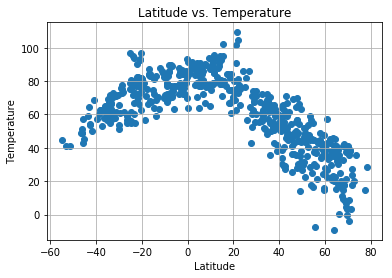

In [8]:


plt.scatter(weather_df["Latitude"], weather_df["Temperature (F)"])
plt.title(f"Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.grid(True) 
plt.savefig("Output/LatitudevsTemperature.png")
plt.show()

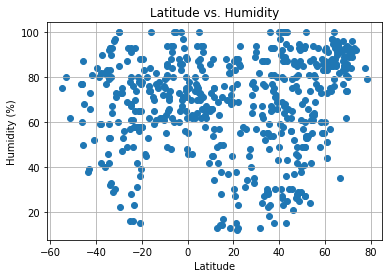

In [9]:

plt.scatter(weather_df["Latitude"], weather_df["Humidity (%)"])
plt.title(f"Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True) 
plt.savefig("Output/LatitudevsHumidity.png")
plt.show()

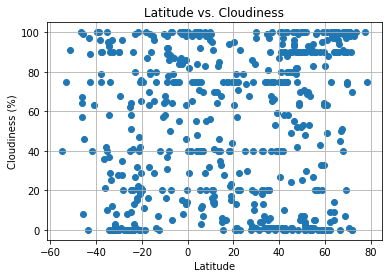

In [10]:

plt.scatter(weather_df["Latitude"], weather_df["Cloudiness (%)"])
plt.title(f"Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True) 
plt.savefig("Output/LatitudevsCloudiness.png")
plt.show()

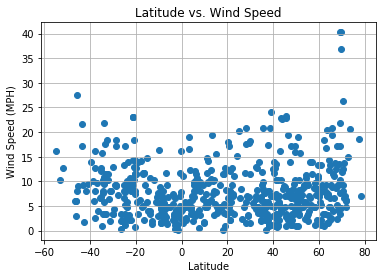

In [11]:
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed (MPH)"])
plt.title(f"Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.grid(True) 
plt.savefig("Output/LatitudevsWind Speed.png")
plt.show()

In [12]:
northern_df = weather_df.loc[weather_df["Latitude"] > 0, :]
print(northern_df)

southern_df = weather_df.loc[weather_df["Latitude"] < 0, :]
print(southern_df)

                     City Country  Latitude  Longitude  Temperature (F)  \
0                 Margate      GB     51.38       1.39            47.66   
1              Butaritari      KI      3.07     172.79            83.55   
2          Villa de Reyes      MX     21.80    -100.93            73.40   
3            Sturgeon Bay      US     44.83     -87.38            45.41   
4               Jamestown      US     42.10     -79.24            40.21   
7                 College      US     64.86    -147.80            41.09   
8                Klaksvík      FO     62.23      -6.59            42.80   
9             Yellowknife      CA     62.46    -114.35            29.80   
10         Cabo San Lucas      MX     22.89    -109.91            65.52   
11                Dudinka      RU     69.41      86.18            37.40   
12            Provideniya      RU     64.38    -173.30            22.50   
13               Khatanga      RU     71.97     102.50            27.57   
14                  Tabou

R squared: 0.7578490456273742


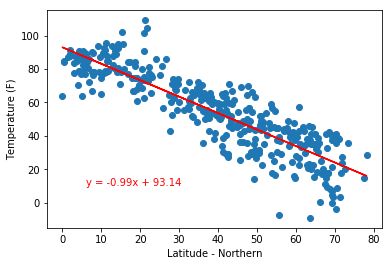

In [13]:
## Convert to floats and store Poverty Rate and Bank Count as x and y values
x_values = northern_df["Latitude"].astype('float')
y_values = northern_df["Temperature (F)"].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),color="red")

# Label plot
plt.xlabel('Latitude - Northern')
plt.ylabel('Temperature (F)')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

R squared: 0.4689067965138792


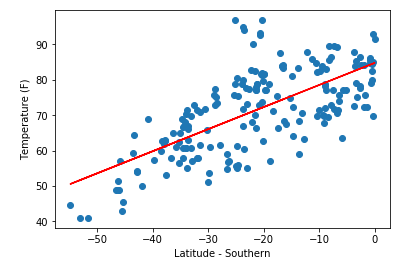

In [14]:
## Convert to floats and store Poverty Rate and Bank Count as x and y values
x_values = southern_df["Latitude"].astype('float')
y_values = southern_df["Temperature (F)"].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),color="red")

# Label plot
plt.xlabel('Latitude - Southern')
plt.ylabel('Temperature (F)')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

R squared: 0.07357682929745263


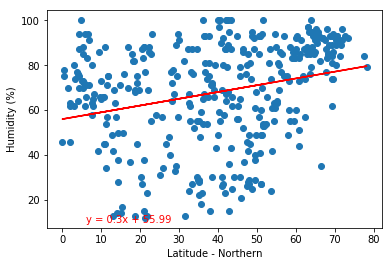

In [15]:
## Convert to floats and store Poverty Rate and Bank Count as x and y values
x_values = northern_df["Latitude"].astype('float')
y_values = northern_df["Humidity (%)"].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),color="red")

# Label plot
plt.xlabel('Latitude - Northern')
plt.ylabel('Humidity (%)')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

R squared: 0.022348494880888362


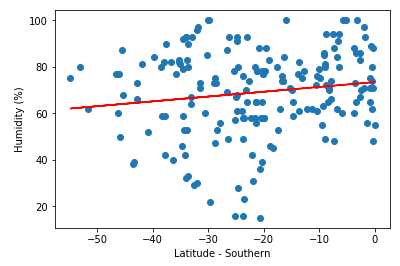

In [16]:
## Convert to floats and store Poverty Rate and Bank Count as x and y values
x_values = southern_df["Latitude"].astype('float')
y_values = southern_df["Humidity (%)"].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),color="red")

# Label plot
plt.xlabel('Latitude - Southern')
plt.ylabel('Humidity (%)')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

R squared: 0.026581544897506092


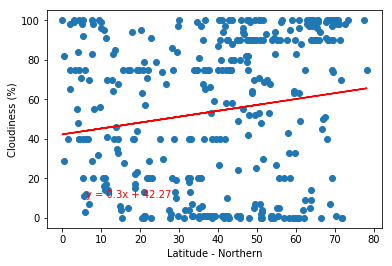

In [17]:
## Convert to floats and store Poverty Rate and Bank Count as x and y values
x_values = northern_df["Latitude"].astype('float')
y_values = northern_df[ "Cloudiness (%)"].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),color="red")

# Label plot
plt.xlabel('Latitude - Northern')
plt.ylabel( "Cloudiness (%)")

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

R squared: 0.019497611411100155


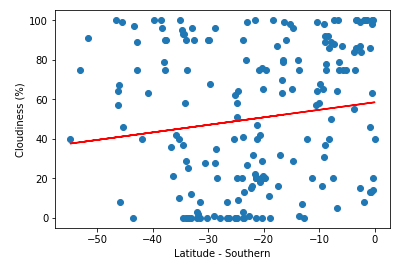

In [18]:
## Convert to floats and store Poverty Rate and Bank Count as x and y values
x_values = southern_df["Latitude"].astype('float')
y_values = southern_df[ "Cloudiness (%)"].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),color="red")

# Label plot
plt.xlabel('Latitude - Southern')
plt.ylabel( "Cloudiness (%)")

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

R squared: 0.022786570870032


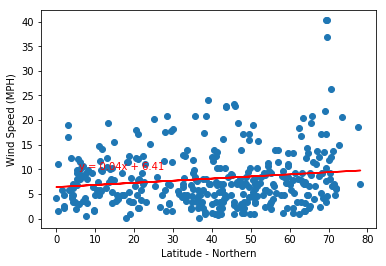

In [19]:
## Convert to floats and store Poverty Rate and Bank Count as x and y values
x_values = northern_df["Latitude"].astype('float')
y_values = northern_df[ "Wind Speed (MPH)"].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),color="red")

# Label plot
plt.xlabel('Latitude - Northern')
plt.ylabel("Wind Speed (MPH)")

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

R squared: 0.12147564887146746


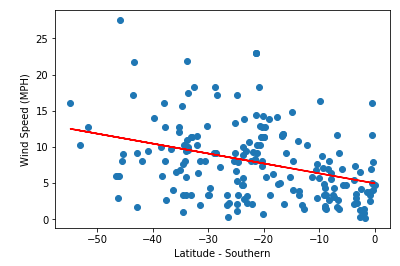

In [20]:
## Convert to floats and store Poverty Rate and Bank Count as x and y values
x_values = southern_df["Latitude"].astype('float')
y_values = southern_df[ "Wind Speed (MPH)"].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),color="red")

# Label plot
plt.xlabel('Latitude - Southern')
plt.ylabel("Wind Speed (MPH)")

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()